 # Micro Project 

Date: November 17, 2024

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Working directory:
# pd.read_csv(‘filename.csv’)

# load the data
churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# review first five records
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_df.shape

(7043, 21)

In [5]:
# variable data types
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Convert TotalCharges to numeric, forcing errors to NaN
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

In [7]:
# Check for missing values and data types
print(churn_df.info())
print(churn_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Display rows where TotalCharges is missing
missing_total_charges = churn_df[churn_df['TotalCharges'].isnull()]
missing_total_charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
# Impute missing TotalCharges based on MonthlyCharges and tenure
churn_df['TotalCharges'] = churn_df.apply(
    lambda row: row['MonthlyCharges'] * row['tenure'] if pd.isnull(row['TotalCharges']) else row['TotalCharges'], 
    axis=1
)

The decision to impute missing values in the TotalCharges column, rather than dropping rows, was made to preserve the dataset's completeness and avoid potential bias. Dropping rows could distort analysis, particularly if these records represent distinct customer profiles. Imputation, using methods based on related features like MonthlyCharges and tenure or grouped medians, helps maintain the data’s integrity and ensures consistency without information loss.

In [10]:
# Check for missing values and data types
print(churn_df.info())
print(churn_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Define categorical columns, excluding columns that are one-hot encoded
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'PaperlessBilling', 'OnlineBackup', 'Churn']

# Convert the remaining categorical columns to object type
churn_df[categorical_cols] = churn_df[categorical_cols].astype('object')

This block identifies columns with categorical data, such as gender and Partner. Setting them as object types helps make sure that these columns are treated as categorical rather than numerical.

In [12]:
# Encode binary columns for ease of analysis
# Map 'Male' to 1 and 'Female' to 0 for gender
churn_df['gender'] = churn_df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Map 'Yes' to 1 and 'No' to 0 for columns with binary options
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','OnlineBackup', 'Churn']
for col in binary_columns:
    churn_df[col] = churn_df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Replace "No internet service" or "No phone service" with "No" in relevant columns for consistency
service_columns = ['MultipleLines', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in service_columns:
    churn_df[col] = churn_df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Convert "Yes" to 1 and "No" to 0 in these service-related columns
for col in service_columns:
    churn_df[col] = churn_df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Check if multi-category columns are still in the DataFrame before applying one-hot encoding
multi_category_columns = ['InternetService', 'Contract', 'PaymentMethod']
existing_columns = [col for col in multi_category_columns if col in churn_df.columns]
churn_df = pd.get_dummies(churn_df, columns=existing_columns, drop_first=True)

Some service-related columns (e.g., StreamingTV, TechSupport) include values like "No internet service" or "No phone service", which indicate the absence of service.For consistency, these values are replaced with "No", simplifying the column to only "Yes" or "No".This consistency ensures that encoding can be done smoothly in the next step.

In [13]:
# Check the final result
print(churn_df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  ...  \
0             0              0               0             1  ...   
1             1              0               1             0  ...   
2             1              0               1             1  ...   
3             0              0               1             0  ...   
4             1              0               0             0  ...   

   MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0           29.85         29.85      0                        False   
1           56.95       1889

In [14]:
# For each categorical column, get the unique value counts
for col in categorical_cols:
    print(f"{col} value counts:")
    print(churn_df[col].value_counts())
    print("\n")

gender value counts:
gender
1    3555
0    3488
Name: count, dtype: int64


Partner value counts:
Partner
0    3641
1    3402
Name: count, dtype: int64


Dependents value counts:
Dependents
0    4933
1    2110
Name: count, dtype: int64


PhoneService value counts:
PhoneService
1    6361
0     682
Name: count, dtype: int64


MultipleLines value counts:
MultipleLines
0    4072
1    2971
Name: count, dtype: int64


OnlineSecurity value counts:
OnlineSecurity
0    5024
1    2019
Name: count, dtype: int64


DeviceProtection value counts:
DeviceProtection
0    4621
1    2422
Name: count, dtype: int64


TechSupport value counts:
TechSupport
0    4999
1    2044
Name: count, dtype: int64


StreamingTV value counts:
StreamingTV
0    4336
1    2707
Name: count, dtype: int64


StreamingMovies value counts:
StreamingMovies
0    4311
1    2732
Name: count, dtype: int64


PaperlessBilling value counts:
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64


OnlineBackup value counts:
OnlineB

In [15]:
# Check the unique values in the columns showing zeros for summary statistics
for col in churn_df.columns:
    print(f"{col} unique values: {churn_df[col].unique()}")

customerID unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values: [0 1]
SeniorCitizen unique values: [0 1]
Partner unique values: [1 0]
Dependents unique values: [0 1]
tenure unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values: [0 1]
MultipleLines unique values: [0 1]
OnlineSecurity unique values: [0 1]
OnlineBackup unique values: [1 0]
DeviceProtection unique values: [0 1]
TechSupport unique values: [0 1]
StreamingTV unique values: [0 1]
StreamingMovies unique values: [0 1]
PaperlessBilling unique values: [1 0]
MonthlyCharges unique values: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges unique values: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn unique values: [0 1]
InternetService_Fibe

In [16]:
# Convert boolean columns to integers for correct numerical analysis
bool_columns = churn_df.select_dtypes(include='bool').columns
churn_df[bool_columns] = churn_df[bool_columns].astype(int)

print(churn_df.dtypes)

customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int32
InternetService_No                         int32
Contract_One year   

In [17]:
churn_df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,64.761692,2279.734304,0.265370,0.439585,0.216669,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,30.090047,2266.794470,0.441561,0.496372,0.412004,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,89.850000,3786.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The dataset provides important statistics across several columns. Key points include:

1. SeniorCitizen: The mean value of 0.162 indicates that about 16.2% of the customers are senior citizens. This column appears to be binary, with values of 0 (not a senior citizen) and 1 (senior citizen).

2. tenure: The average tenure of customers is approximately 32.37 months. The minimum tenure is 0 months, and the maximum is 72 months. The median (50th percentile) tenure is 29 months, which means half of the customers have been with the company for less than 29 months. This suggests a mix of both newer and long-term customers.

3. MonthlyCharges: Monthly charges range from $18.25 to $118.75, with a mean monthly charge of $64.76. This spread suggests a range of customer plan options, from basic to premium services.

4. TotalCharges: The average total charge is approximately $2279.73, with a large standard deviation of $2266.79. This high variability reflects a wide range of total spending across customers, likely due to differences in tenure, services, and plan levels.

In [18]:
#Summary Statistics (Interquartile Range - IQR) for 'TotalCharges' column
Q1 = churn_df['TotalCharges'].quantile(0.25)
Q3 = churn_df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = churn_df[(churn_df['TotalCharges'] < lower_bound) | (churn_df['TotalCharges'] > upper_bound)]

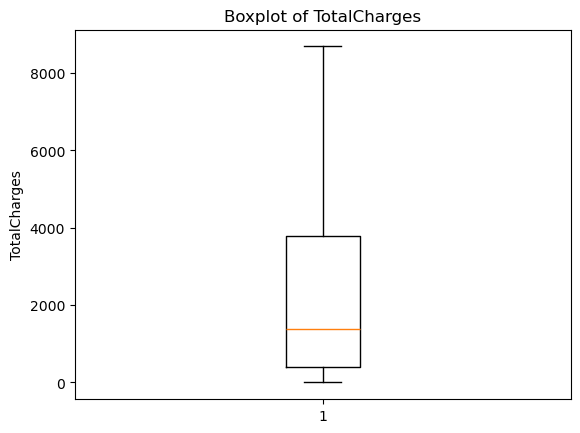

In [19]:
import matplotlib.pyplot as plt

# Create a boxplot for 'TotalCharges'
plt.boxplot(churn_df['TotalCharges'].dropna())
plt.title('Boxplot of TotalCharges')
plt.ylabel('TotalCharges')
plt.show()

In this boxplot of TotalCharges, there don't appear to be any outliers. In a boxplot, outliers would typically appear as individual points outside of the "whiskers" (the lines extending from the box). Here, the whiskers cover the full range of the data, suggesting that there are no extreme values far from the interquartile range that would be classified as outliers.

In [20]:
 #Save the cleaned churn DataFrame to a CSV file
churn_df.to_csv("C:/Users/davis/OneDrive/Desktop/Data Science/ANA 500/Data/cleaned_churn_data.csv", index=False)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import plotly.express as px
import plotly.graph_objects as go

In [27]:
# Working directory:
# pd.read_csv(‘filename.csv’)

# load the data
churn_df = pd.read_csv('cleaned_churn_data.csv')

# review first five records
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,29.85,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,53.85,108.15,1,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [28]:
# Convert any boolean columns to numeric (if applicable)
churn_df = churn_df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
# Select only numeric columns
numeric_df = churn_df.select_dtypes(include=['float64', 'int64'])
# Confirm only numeric columns are selected
print(numeric_df.dtypes)

C:\Users\davis\AppData\Local\Temp\ipykernel_22768\1937232141.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_One year                          int64
Contract_Two year   

In [29]:
#This heatmap highlights which attributes correlate most strongly with churn, giving an overview of influential variables.
# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Interactive heatmap of correlations with Plotly
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                title="Correlation Matrix (Highlighting Churn Correlation)")
fig.update_layout(coloraxis_colorbar=dict(title="Correlation"))
fig.show()


This matrix displays the correlations between various factors and customer churn, which is highlighted for emphasis.
The color scale ranges from -1 (purple) to 1 (yellow), where 1 indicates a perfect positive correlation, -1 a perfect negative correlation, and values closer to 0 a weaker relationship.

1. We can identify that "tenure" has a noticeable negative correlation with "Churn", meaning that customers with longer tenure tend to churn less.

2. The "Contract_Two year" variable has a negative correlation with churn, indicating that customers with two-year contracts are less likely to churn.

3. "MonthlyCharges" has a positive correlation with churn, suggesting that customers with higher monthly charges may be more likely to churn.

In [30]:
#This plot will help us see if there’s a visible difference in tenure between customers who churn and those who stay. 
#Shorter subscription lengths may be more common among churned customers if the hypothesis holds true.

# Interactive box plot of tenure (subscription length) by churn status
fig = px.box(numeric_df, x="Churn", y="tenure", title="Tenure vs. Churn",
             labels={"tenure": "Subscription Length (Months)", "Churn": "Churn Status"},
             color="Churn")
fig.update_layout(xaxis_title="Churn (1 = Yes, 0 = No)", yaxis_title="Tenure (Months)")
fig.show()

This box plot visualizes the relationship between tenure (in months) and churn.

1. Customers who did not churn (0) generally have a higher median tenure compared to those who churned (1).

2. The box for non-churners extends up to about 70 months, showing that long-tenured customers are more likely to stay.

3. For churners, the box plot is skewed toward shorter tenure periods, indicating that newer customers are more prone to leaving.

In [31]:
# In the combined plot, facet_col="variable" separates the data for each contract type into distinct subplots,
# making it easier to visually compare churn rates across contract types. This approach provides a clear,
#interactive view for both contract types.

# Combining both contract types in one plot
fig_combined = px.histogram(numeric_df.melt(id_vars=["Churn"], 
                                            value_vars=["Contract_One year", "Contract_Two year"]),
                            x="value", color="Churn", barmode="group",
                            facet_col="variable",
                            title="Churn Rate by Contract Type",
                            labels={"value": "Contract Type", "Churn": "Churn Status", "variable": "Contract Type"})
fig_combined.update_layout(xaxis_title="Contract Type", yaxis_title="Customer Count")
fig_combined.show()

This bar plot shows the number of customers who churned (1) and did not churn (0) based on contract type.

1. For one-year contracts, there is a substantial amount of churn, with a noticeable number of customers who left.

2. For two-year contracts, churn is much lower. The number of churners in two-year contracts is significantly smaller compared to one-year contracts.

3. This suggests that customers with longer contract commitments (like two-year contracts) are less likely to churn compared to those with shorter commitments.

In [32]:
#This plot helps to see if customers who spend less per month are more likely to churn. 
# We can also observe any skew or variability in spending between churned and retained customers.
# Interactive violin plot for monthly charges by churn status
fig = px.violin(numeric_df, x="Churn", y="MonthlyCharges", box=True, points="all",
                title="Monthly Charges vs. Churn",
                labels={"MonthlyCharges": "Monthly Spending ($)", "Churn": "Churn Status"},
                color="Churn")
fig.update_layout(xaxis_title="Churn (1 = Yes, 0 = No)", yaxis_title="Monthly Charges ($)")
fig.show()

This plot shows the distribution of monthly charges across customers who churned and those who didn't.

i. X-axis (Churn): The churn status, where 0 represents customers who did not churn and 1 represents customers who did.
ii. Y-axis (Monthly Charges): The amount customers pay monthly, in dollars.
iii. Violin Shape: Each "violin" shape shows the distribution of monthly charges for each group (churned vs. non-churned). The width of the violin indicates the density (frequency) of monthly charges at various price points within each churn status group.

1. Customers who churn (indicated by "1") seem to have a wider range of monthly charges, with a central concentration around higher charges than those who do not churn.

2. Customers who do not churn (indicated by "0") have a somewhat lower median monthly charge and a denser distribution below the higher charge levels.

In [44]:
# Interactive scatter plot of monthly charges vs. tenure, colored by churn
fig = px.scatter(churn_df, x="tenure", y="MonthlyCharges", color="Churn",
                 title="Monthly Spending vs. Tenure (Colored by Churn)",
                 labels={"tenure": "Subscription Length (Months)", "MonthlyCharges": "Monthly Spending ($)"},
                 hover_data=['Contract_One year', 'Contract_Two year'])  
fig.update_layout(xaxis_title="Tenure (Months)", yaxis_title="Monthly Charges ($)")
fig.show()

This scatter plot visualizes monthly spending in relation to tenure, with color representing churn status.

i. X-axis (Tenure): The duration (in months) that a customer has been with the company.
ii. Y-axis (Monthly Charges): The monthly amount each customer spends.
iii. Color: The color gradient (from blue to yellow) shows churn status, with yellow indicating churn and dark blue indicating no churn.

1. Short Tenure and High Churn: There is a high concentration of yellow points (churn) among customers with shorter tenure (closer to the left side), particularly in the upper range of monthly charges.

2. Long Tenure and Low Churn: Customers with longer tenure (closer to the right side) are mostly dark blue, indicating they are less likely to churn, regardless of their monthly charges.

3. High Monthly Charges and Churn: There is a noticeable number of yellow points (churn) in the higher monthly charges range across different tenures, suggesting that customers paying more per month may have a higher chance of churning.

# Model Building and Evaluation

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Define features and target variable
X = numeric_df.drop("Churn", axis=1)  # Drop the target variable column to get features
y = numeric_df["Churn"]  # Define the target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "roc_auc": roc_auc}

# Logistic Regression

In [37]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print("Logistic Regression Evaluation:")
log_reg_metrics = evaluate_model(log_reg, X_test, y_test)


Logistic Regression Evaluation:
Accuracy: 0.8204
Precision: 0.6852
Recall: 0.5952
F1 Score: 0.6370
ROC AUC Score: 0.8622


# Support Vector Classifier (SVM)

In [38]:
# SVM Model
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Evaluate using the evaluate_model function
print("\nSVM Evaluation:")
svm_metrics = evaluate_model(svm_clf, X_test, y_test)


SVM Evaluation:
Accuracy: 0.8211
Precision: 0.6873
Recall: 0.5952
F1 Score: 0.6379
ROC AUC Score: 0.8527


# Decision Tree

In [39]:
# Decision Tree Model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
print("\nDecision Tree Evaluation:")
tree_metrics = evaluate_model(tree, X_test, y_test)


Decision Tree Evaluation:
Accuracy: 0.7104
Precision: 0.4548
Recall: 0.4718
F1 Score: 0.4632
ROC AUC Score: 0.6346


# Random Forest

In [40]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("\nRandom Forest Evaluation:")
rf_metrics = evaluate_model(rf, X_test, y_test)


Random Forest Evaluation:
Accuracy: 0.8048
Precision: 0.6856
Recall: 0.4853
F1 Score: 0.5683
ROC AUC Score: 0.8398


# Compare Models

In [41]:
# Collect all metrics in a DataFrame for comparison
metrics_df = pd.DataFrame({
    "Logistic Regression": log_reg_metrics,
    "Decision Tree": tree_metrics,
    "Random Forest": rf_metrics,
     "SVM": svm_metrics
}).T

print(metrics_df)

                     accuracy  precision    recall        f1   roc_auc
Logistic Regression  0.820440   0.685185  0.595174  0.637016  0.862154
Decision Tree        0.710433   0.454780  0.471850  0.463158  0.634650
Random Forest        0.804826   0.685606  0.485255  0.568289  0.839764
SVM                  0.821150   0.687307  0.595174  0.637931  0.852706


Each model's performance based on the key metrics provided in your comparison table. Here’s what each metric indicates:

i. Accuracy: This is the percentage of correct predictions out of all predictions made. It gives an overall measure of how well the model performs on both classes (churn and non-churn). However, it may not be sufficient by itself, especially if there's an imbalance in the classes (e.g., more non-churners than churners).

ii. Precision: This is the percentage of true positive predictions out of all positive predictions. High precision indicates that the model is good at avoiding false positives, meaning it rarely classifies a non-churner as a churner.

iii. Recall: This is the percentage of true positive predictions out of all actual positives. High recall means the model successfully identifies most churners. In churn prediction, recall is often prioritized because missing a churner could mean a lost customer.

iv. F1 Score: This is the harmonic mean of precision and recall, giving a balanced measure. It’s particularly useful when you want to balance between precision and recall, especially if they have very different values.

v. ROC AUC: This is the area under the Receiver Operating Characteristic curve, which measures how well the model distinguishes between churners and non-churners across various threshold settings. A higher ROC AUC indicates better model performance in distinguishing between the classes.

Model Evaluation:

1. SVM Evaluation:
Accuracy: 82.1%, the highest among the models.
Precision: 68.7%, meaning that 68.7% of the churn predictions made by the model were correct.
Recall: 59.5%, which is fairly good but shows that it missed some actual churners.
F1 Score: 63.8%, indicating a reasonable balance between precision and recall.
ROC AUC: 85.3%, slightly lower than Logistic Regression but still very high, suggesting strong ability to distinguish churners from non-churners.

2. Logistic Regression Evaluation:
Accuracy: 82.0%, slightly lower than SVM and among the highest of all models.
Precision: 68.5%, meaning that 68.5% of the churn predictions made by the model were correct.
Recall: 59.5%, similar to SVM, showing that it successfully identifies a fair number of churners but still misses some.
F1 Score: 63.7%, which reflects a good balance between precision and recall.
ROC AUC: 86.2%, the highest of all models, suggesting that Logistic Regression performs best in distinguishing churners from non-churners.

3. Decision Tree Evaluation:
Accuracy: 71.0%, the lowest among all models.
Precision: 45.5%, indicating that nearly half of the churn predictions were incorrect.
Recall: 47.2%, which is also low, meaning that it missed many actual churners.
F1 Score: 46.3%, suggesting a poor balance between precision and recall.
ROC AUC: 63.5%, relatively low, indicating that the model struggles to distinguish between churners and non-churners. The Decision Tree model has the weakest performance across all metrics, making it unsuitable for this task.

4. Random Forest Evaluation:
Accuracy: 80.5%, slightly lower than both SVM and Logistic Regression.
Precision: 68.6%, comparable to Logistic Regression and SVM.
Recall: 48.5%, lower than both Logistic Regression and SVM, indicating it misses more actual churners.
F1 Score: 56.8%, reflecting an imbalance between precision and recall.
ROC AUC: 83.9%, lower than both Logistic Regression and SVM but still relatively high, showing good predictive power. The Random Forest model has high precision but lower recall, indicating a more conservative approach to predicting churn.

Summary and Recommendation:

1. SVM appears to be the best model in this case, as it has the highest accuracy (82.1%) and a competitive ROC AUC (85.3%), making it the most balanced and robust model for churn prediction.

2. Logistic Regression is a close second, with the highest ROC AUC (86.2%) and competitive performance in all other metrics. It is also simpler to implement and interpret, making it a strong contender.

2. Random Forest: While Random Forest performs fairly well, its lower recall (48.5%) means it’s less effective at capturing actual churners than SVM and Logistic Regression.

3. Decision Tree: This model has the lowest metrics across the board and is not recommended for this task.